In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("GMRF.jl");
include("grid.jl");
include("gibbs.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [3]:
grid_target = generateTargetGridV1(F);

In [4]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [22]:
include("gibbs.jl");

niter = 10
δ² = 1
κᵤ₀ = 10
μ₀ = zeros(m)
W = buildStructureMatrix(m₁, m₂);

κᵤ, μ = gibbs(niter, data, δ²=δ², κᵤ₀=κᵤ₀, μ₀=μ₀, W=W);


13.927966033681928
13.927966033681928
-3.2506890787756243e6
155.26325667607017
155.26325667607017
-6.888406526696146e37
854.5098103928394
854.5098103928394
-4.40063979180927e188
67.25304555374193
67.25304555374193
-4.681412400676413e17
1147.8384007277991
1147.8384007277991
-4.978807448364204e251
9968.475381048778
9968.475381048778
-Inf
222.9800323988082
222.9800323988082
-1.22188029767571e51
6782.162664225379
6782.162664225379
-Inf
-64.07842880528213
-64.07842880528213
1617.9079903463335
-3.250527060155907e6
-3.250527060155907e6
1016.6656883808555
-6.888406526696146e37
-6.888406526696146e37
5.2974409663582006e32
-4.40063979180927e188
-4.40063979180927e188
2.2561705111305365e183
-4.681412400676403e17
-4.681412400676403e17
3.6001803526665503e12
-4.978807448364204e251
-4.978807448364204e251
5.10518428093296e246
-33.184427574193116
-33.184427574193116
1000.00505507853
-1.22188029767571e51
-1.22188029767571e51
6.264476135671004e45
-3.132238067835502e45
-3.132238067835502e45
-3.1322139797591

Excessive output truncated after 524299 bytes.

1000.0
1000.0
1000.0
-4.40063979180927e188
-4.40063979180927e188
4.000523235712256e87
1000.0
1000.0
1000.0
-4.978807448364204e251
-4.978807448364204e251
9.052245048727004e150
-1.2967507616896743e213
-1.2967507616896743e213
1.768270682841184e112
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
-4.40063979180927e188
-4.40063979180927e188
2.0192772593167987e87
1000.0
1000.0
1000.0
-4.978807448364204e251
-4.978807448364204e251
4.5691504574908736e150
-1.2967507616896743e213
-1.2967507616896743e213
8.925404422859384e111
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
-4.40063979180927e188
-4.40063979180927e188
2.40882570899103e87
1000.0
1000.0
1000.0
-4.978807448364204e251
-4.978807448364204e251
5.4506071612850256e150
-1.2967507616896743e213
-1.2967507616896743e213
1.0647246948247287e112
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
100

In [20]:
W = buildStructureMatrix(2, 2);
μ = zeros(4, 3);
μ[:, 1] = ones(4);
μ[1, 2] = 2;
μ[2, 2] = 3;

In [21]:
μ

4×3 Matrix{Float64}:
 1.0  2.0  0.0
 1.0  3.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0

In [7]:
reshape(μ[:, end], m₁, m₂)

3×3 Matrix{Float64}:
  -5.69577e91   -1.34629e25  -2.18273e32
  -2.55283e33  482.983       -1.16987e27
 379.688       482.705       -6.27006e21

In [9]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

Distance entre les deux matrices

In [8]:
norm(reshape(μ[:, end], m₁, m₂) .- grid_target[:, :, 1], 2)

5.695773338226049e91

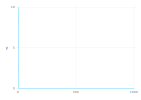

In [9]:
plot(y=κᵤ, Geom.line)

In [10]:
mean(κᵤ)

0.010000010719274248

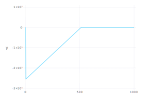

In [13]:
plot(y=μ[1, :], Geom.line)